# Breaking a CAPTCHA system

Ref: https://medium.com/@ageitgey/how-to-break-a-captcha-system-in-15-minutes-with-machine-learning-dbebb035a710

In [121]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

Install some packages below (if not installed already):

In [122]:
!pip install opencv-python
!pip install imutils

In this exercise you will break `Really Simple CAPTCHA` plugin of WordPress: https://wordpress.org/plugins/really-simple-captcha/

Try a demo here: https://contactform7.com/captcha/

The plugin generates 4-letter CAPTCHAs using a random mix of four different fonts. Letters are from 'ABCDEFGHJKLMNPQRSTUVWXYZ23456789' and "O", "I" and "1" are not used to avoid user confusion. That leaves us with a total of 32 possible letters and numbers that we need to recognize.

Since we have the source code to the WordPress plug-in, we can modify it to save out CAPTCHA images along with the expected answer for each image. We generated 9955 images under folder `generated_captcha_images`. Run the following code to show 10 images to take a look.

In [123]:
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"

## Step 1: Extract single letters from CAPTCHA images

### Run the following code to show 10 images to take a look.

In [124]:
import os.path
import glob # glob.glob returns the list of files with their full path, and it supports wildcards

from IPython.display import Image

captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))

for (i, captcha_image_file) in enumerate(captcha_image_files):
    if i==10: break
    print(captcha_image_file)
    display(Image(filename=captcha_image_file))

generated_captcha_images/Q6YN.png


generated_captcha_images/XGWB.png


generated_captcha_images/LPHV.png


generated_captcha_images/UYBH.png


generated_captcha_images/XUSA.png


generated_captcha_images/3CE3.png


generated_captcha_images/DKB5.png


generated_captcha_images/E59F.png


generated_captcha_images/5VL7.png


generated_captcha_images/AVQ8.png


### Now we illustrate how to process an image `generated_captcha_images/222X.png`

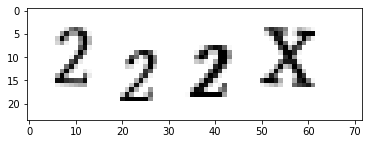

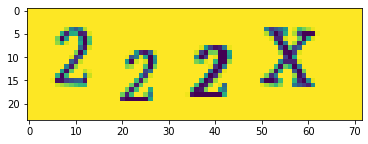

In [125]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt
import cv2 # OpenCV, a popular framework for computer vision and image processing

captcha_image_file = 'generated_captcha_images/222X.png' # normal
# captcha_image_file = 'generated_captcha_images/2W4M.png' # try this: 3 objects, 2 letters are merged
# captcha_image_file = 'generated_captcha_images/3PH3.png' # try this: 5 objects detected
# captcha_image_file = 'generated_captcha_images/JYU4.png' # try this: 6 objects detected

captcha_correct_text = os.path.splitext(captcha_image_file)[0]

# Load the image and convert it to grayscale
image = cv2.imread(captcha_image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

plt.imshow(gray)
plt.show()

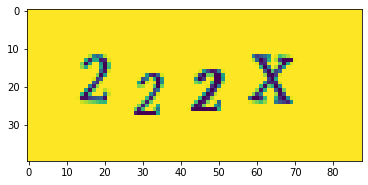

In [126]:
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

plt.imshow(gray)
plt.show()

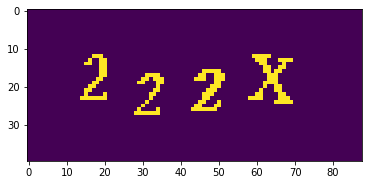

In [127]:
# threshold the image (convert it to pure black and white)
# we use Otsu’s binarization
# check: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(thresh)
plt.show()

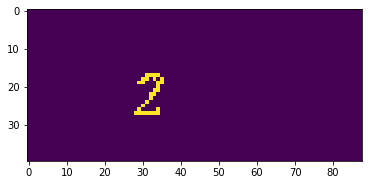

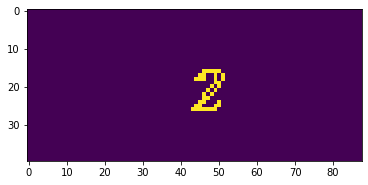

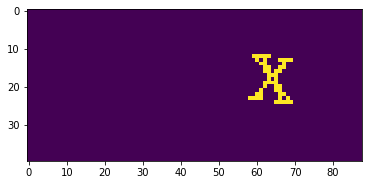

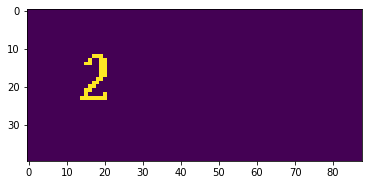

In [128]:
import numpy as np

# find the contours (continuous blobs of pixels) the image
# check:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

zero_img = np.zeros_like(thresh)

for i in range(len(contours)):
    temp = cv2.drawContours(zero_img.copy(), contours, i, (255,0,0), 1)
    plt.imshow(temp)
    plt.show()

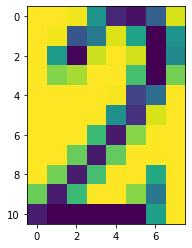

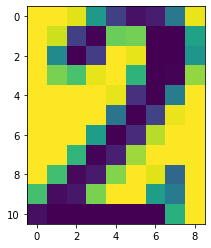

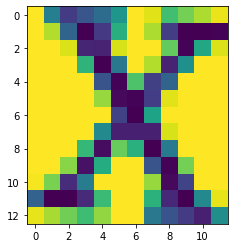

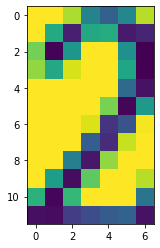

In [129]:
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = gray[y:y+h, x:x+w]
    plt.imshow(letter_image)
    plt.show()

### Putting things together: get letters from images

Using what we have learnt above, write your code to save get the letters of all images. The letter-images are stored as 32 folders under folder `extracted_letter_images`.

For example, `extracted_letter_images/A` is a folder that saves all images of letter `A`. After you complete, each letter-folder should contain over 1000 letter-images.

Hint: (1) consider how to name different files in a letter-folder differently? (2) ingore those images with number of contours other than 4.

In [130]:
#Importing libraries

import os
import glob
import cv2
import imutils

#Making up of folders
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"
LETTER_IMAGES_FOLDER = "extracted_letter_images" # the output for training
SKIPPED_FOLDER = "skipped_images" # those images are skipped
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
counts = {} # counts['A'] = number of 'A'-images, so that next 'A'-image can be named as counts['A'] + 1

# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    print("[Line Update] processing image fno {}/{}".format(i + 1, len(captcha_image_files)))

    #############################################################################
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]
    #############################################################################
    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    contours = contours[0]

#Making up of empty list 

    letter_image_regions = []

# looping out and using boundingrect function 

    for contour in contours:
        
        (x, y, w, h) = cv2.boundingRect(contour)


        if w / h > 1.25:
            
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            
            letter_image_regions.append((x, y, w, h))

    
    if len(letter_image_regions) != 4:
        continue

# Sorting out the list of letter_image_regions 

    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_correct_text):
        x, y, w, h = letter_bounding_box

        
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        
        save_path = os.path.join(LETTER_IMAGES_FOLDER, letter_text)

        if not os.path.exists(save_path):
            os.makedirs(save_path)
    
   
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[letter_text] = count + 1

    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

[Line Update] processing image fno 1/9955
[Line Update] processing image fno 2/9955
[Line Update] processing image fno 3/9955
[Line Update] processing image fno 4/9955
[Line Update] processing image fno 5/9955
[Line Update] processing image fno 6/9955
[Line Update] processing image fno 7/9955
[Line Update] processing image fno 8/9955
[Line Update] processing image fno 9/9955
[Line Update] processing image fno 10/9955
[Line Update] processing image fno 11/9955
[Line Update] processing image fno 12/9955
[Line Update] processing image fno 13/9955
[Line Update] processing image fno 14/9955
[Line Update] processing image fno 15/9955
[Line Update] processing image fno 16/9955
[Line Update] processing image fno 17/9955
[Line Update] processing image fno 18/9955
[Line Update] processing image fno 19/9955
[Line Update] processing image fno 20/9955
[Line Update] processing image fno 21/9955
[Line Update] processing image fno 22/9955
[Line Update] processing image fno 23/9955
[Line Update] proces

[Line Update] processing image fno 281/9955
[Line Update] processing image fno 282/9955
[Line Update] processing image fno 283/9955
[Line Update] processing image fno 284/9955
[Line Update] processing image fno 285/9955
[Line Update] processing image fno 286/9955
[Line Update] processing image fno 287/9955
[Line Update] processing image fno 288/9955
[Line Update] processing image fno 289/9955
[Line Update] processing image fno 290/9955
[Line Update] processing image fno 291/9955
[Line Update] processing image fno 292/9955
[Line Update] processing image fno 293/9955
[Line Update] processing image fno 294/9955
[Line Update] processing image fno 295/9955
[Line Update] processing image fno 296/9955
[Line Update] processing image fno 297/9955
[Line Update] processing image fno 298/9955
[Line Update] processing image fno 299/9955
[Line Update] processing image fno 300/9955
[Line Update] processing image fno 301/9955
[Line Update] processing image fno 302/9955
[Line Update] processing image f

[Line Update] processing image fno 633/9955
[Line Update] processing image fno 634/9955
[Line Update] processing image fno 635/9955
[Line Update] processing image fno 636/9955
[Line Update] processing image fno 637/9955
[Line Update] processing image fno 638/9955
[Line Update] processing image fno 639/9955
[Line Update] processing image fno 640/9955
[Line Update] processing image fno 641/9955
[Line Update] processing image fno 642/9955
[Line Update] processing image fno 643/9955
[Line Update] processing image fno 644/9955
[Line Update] processing image fno 645/9955
[Line Update] processing image fno 646/9955
[Line Update] processing image fno 647/9955
[Line Update] processing image fno 648/9955
[Line Update] processing image fno 649/9955
[Line Update] processing image fno 650/9955
[Line Update] processing image fno 651/9955
[Line Update] processing image fno 652/9955
[Line Update] processing image fno 653/9955
[Line Update] processing image fno 654/9955
[Line Update] processing image f

[Line Update] processing image fno 944/9955
[Line Update] processing image fno 945/9955
[Line Update] processing image fno 946/9955
[Line Update] processing image fno 947/9955
[Line Update] processing image fno 948/9955
[Line Update] processing image fno 949/9955
[Line Update] processing image fno 950/9955
[Line Update] processing image fno 951/9955
[Line Update] processing image fno 952/9955
[Line Update] processing image fno 953/9955
[Line Update] processing image fno 954/9955
[Line Update] processing image fno 955/9955
[Line Update] processing image fno 956/9955
[Line Update] processing image fno 957/9955
[Line Update] processing image fno 958/9955
[Line Update] processing image fno 959/9955
[Line Update] processing image fno 960/9955
[Line Update] processing image fno 961/9955
[Line Update] processing image fno 962/9955
[Line Update] processing image fno 963/9955
[Line Update] processing image fno 964/9955
[Line Update] processing image fno 965/9955
[Line Update] processing image f

[Line Update] processing image fno 1131/9955
[Line Update] processing image fno 1132/9955
[Line Update] processing image fno 1133/9955
[Line Update] processing image fno 1134/9955
[Line Update] processing image fno 1135/9955
[Line Update] processing image fno 1136/9955
[Line Update] processing image fno 1137/9955
[Line Update] processing image fno 1138/9955
[Line Update] processing image fno 1139/9955
[Line Update] processing image fno 1140/9955
[Line Update] processing image fno 1141/9955
[Line Update] processing image fno 1142/9955
[Line Update] processing image fno 1143/9955
[Line Update] processing image fno 1144/9955
[Line Update] processing image fno 1145/9955
[Line Update] processing image fno 1146/9955
[Line Update] processing image fno 1147/9955
[Line Update] processing image fno 1148/9955
[Line Update] processing image fno 1149/9955
[Line Update] processing image fno 1150/9955
[Line Update] processing image fno 1151/9955
[Line Update] processing image fno 1152/9955
[Line Upda

[Line Update] processing image fno 1347/9955
[Line Update] processing image fno 1348/9955
[Line Update] processing image fno 1349/9955
[Line Update] processing image fno 1350/9955
[Line Update] processing image fno 1351/9955
[Line Update] processing image fno 1352/9955
[Line Update] processing image fno 1353/9955
[Line Update] processing image fno 1354/9955
[Line Update] processing image fno 1355/9955
[Line Update] processing image fno 1356/9955
[Line Update] processing image fno 1357/9955
[Line Update] processing image fno 1358/9955
[Line Update] processing image fno 1359/9955
[Line Update] processing image fno 1360/9955
[Line Update] processing image fno 1361/9955
[Line Update] processing image fno 1362/9955
[Line Update] processing image fno 1363/9955
[Line Update] processing image fno 1364/9955
[Line Update] processing image fno 1365/9955
[Line Update] processing image fno 1366/9955
[Line Update] processing image fno 1367/9955
[Line Update] processing image fno 1368/9955
[Line Upda

[Line Update] processing image fno 1567/9955
[Line Update] processing image fno 1568/9955
[Line Update] processing image fno 1569/9955
[Line Update] processing image fno 1570/9955
[Line Update] processing image fno 1571/9955
[Line Update] processing image fno 1572/9955
[Line Update] processing image fno 1573/9955
[Line Update] processing image fno 1574/9955
[Line Update] processing image fno 1575/9955
[Line Update] processing image fno 1576/9955
[Line Update] processing image fno 1577/9955
[Line Update] processing image fno 1578/9955
[Line Update] processing image fno 1579/9955
[Line Update] processing image fno 1580/9955
[Line Update] processing image fno 1581/9955
[Line Update] processing image fno 1582/9955
[Line Update] processing image fno 1583/9955
[Line Update] processing image fno 1584/9955
[Line Update] processing image fno 1585/9955
[Line Update] processing image fno 1586/9955
[Line Update] processing image fno 1587/9955
[Line Update] processing image fno 1588/9955
[Line Upda

[Line Update] processing image fno 1758/9955
[Line Update] processing image fno 1759/9955
[Line Update] processing image fno 1760/9955
[Line Update] processing image fno 1761/9955
[Line Update] processing image fno 1762/9955
[Line Update] processing image fno 1763/9955
[Line Update] processing image fno 1764/9955
[Line Update] processing image fno 1765/9955
[Line Update] processing image fno 1766/9955
[Line Update] processing image fno 1767/9955
[Line Update] processing image fno 1768/9955
[Line Update] processing image fno 1769/9955
[Line Update] processing image fno 1770/9955
[Line Update] processing image fno 1771/9955
[Line Update] processing image fno 1772/9955
[Line Update] processing image fno 1773/9955
[Line Update] processing image fno 1774/9955
[Line Update] processing image fno 1775/9955
[Line Update] processing image fno 1776/9955
[Line Update] processing image fno 1777/9955
[Line Update] processing image fno 1778/9955
[Line Update] processing image fno 1779/9955
[Line Upda

[Line Update] processing image fno 1950/9955
[Line Update] processing image fno 1951/9955
[Line Update] processing image fno 1952/9955
[Line Update] processing image fno 1953/9955
[Line Update] processing image fno 1954/9955
[Line Update] processing image fno 1955/9955
[Line Update] processing image fno 1956/9955
[Line Update] processing image fno 1957/9955
[Line Update] processing image fno 1958/9955
[Line Update] processing image fno 1959/9955
[Line Update] processing image fno 1960/9955
[Line Update] processing image fno 1961/9955
[Line Update] processing image fno 1962/9955
[Line Update] processing image fno 1963/9955
[Line Update] processing image fno 1964/9955
[Line Update] processing image fno 1965/9955
[Line Update] processing image fno 1966/9955
[Line Update] processing image fno 1967/9955
[Line Update] processing image fno 1968/9955
[Line Update] processing image fno 1969/9955
[Line Update] processing image fno 1970/9955
[Line Update] processing image fno 1971/9955
[Line Upda

[Line Update] processing image fno 2143/9955
[Line Update] processing image fno 2144/9955
[Line Update] processing image fno 2145/9955
[Line Update] processing image fno 2146/9955
[Line Update] processing image fno 2147/9955
[Line Update] processing image fno 2148/9955
[Line Update] processing image fno 2149/9955
[Line Update] processing image fno 2150/9955
[Line Update] processing image fno 2151/9955
[Line Update] processing image fno 2152/9955
[Line Update] processing image fno 2153/9955
[Line Update] processing image fno 2154/9955
[Line Update] processing image fno 2155/9955
[Line Update] processing image fno 2156/9955
[Line Update] processing image fno 2157/9955
[Line Update] processing image fno 2158/9955
[Line Update] processing image fno 2159/9955
[Line Update] processing image fno 2160/9955
[Line Update] processing image fno 2161/9955
[Line Update] processing image fno 2162/9955
[Line Update] processing image fno 2163/9955
[Line Update] processing image fno 2164/9955
[Line Upda

[Line Update] processing image fno 2342/9955
[Line Update] processing image fno 2343/9955
[Line Update] processing image fno 2344/9955
[Line Update] processing image fno 2345/9955
[Line Update] processing image fno 2346/9955
[Line Update] processing image fno 2347/9955
[Line Update] processing image fno 2348/9955
[Line Update] processing image fno 2349/9955
[Line Update] processing image fno 2350/9955
[Line Update] processing image fno 2351/9955
[Line Update] processing image fno 2352/9955
[Line Update] processing image fno 2353/9955
[Line Update] processing image fno 2354/9955
[Line Update] processing image fno 2355/9955
[Line Update] processing image fno 2356/9955
[Line Update] processing image fno 2357/9955
[Line Update] processing image fno 2358/9955
[Line Update] processing image fno 2359/9955
[Line Update] processing image fno 2360/9955
[Line Update] processing image fno 2361/9955
[Line Update] processing image fno 2362/9955
[Line Update] processing image fno 2363/9955
[Line Upda

[Line Update] processing image fno 2716/9955
[Line Update] processing image fno 2717/9955
[Line Update] processing image fno 2718/9955
[Line Update] processing image fno 2719/9955
[Line Update] processing image fno 2720/9955
[Line Update] processing image fno 2721/9955
[Line Update] processing image fno 2722/9955
[Line Update] processing image fno 2723/9955
[Line Update] processing image fno 2724/9955
[Line Update] processing image fno 2725/9955
[Line Update] processing image fno 2726/9955
[Line Update] processing image fno 2727/9955
[Line Update] processing image fno 2728/9955
[Line Update] processing image fno 2729/9955
[Line Update] processing image fno 2730/9955
[Line Update] processing image fno 2731/9955
[Line Update] processing image fno 2732/9955
[Line Update] processing image fno 2733/9955
[Line Update] processing image fno 2734/9955
[Line Update] processing image fno 2735/9955
[Line Update] processing image fno 2736/9955
[Line Update] processing image fno 2737/9955
[Line Upda

[Line Update] processing image fno 2934/9955
[Line Update] processing image fno 2935/9955
[Line Update] processing image fno 2936/9955
[Line Update] processing image fno 2937/9955
[Line Update] processing image fno 2938/9955
[Line Update] processing image fno 2939/9955
[Line Update] processing image fno 2940/9955
[Line Update] processing image fno 2941/9955
[Line Update] processing image fno 2942/9955
[Line Update] processing image fno 2943/9955
[Line Update] processing image fno 2944/9955
[Line Update] processing image fno 2945/9955
[Line Update] processing image fno 2946/9955
[Line Update] processing image fno 2947/9955
[Line Update] processing image fno 2948/9955
[Line Update] processing image fno 2949/9955
[Line Update] processing image fno 2950/9955
[Line Update] processing image fno 2951/9955
[Line Update] processing image fno 2952/9955
[Line Update] processing image fno 2953/9955
[Line Update] processing image fno 2954/9955
[Line Update] processing image fno 2955/9955
[Line Upda

[Line Update] processing image fno 3133/9955
[Line Update] processing image fno 3134/9955
[Line Update] processing image fno 3135/9955
[Line Update] processing image fno 3136/9955
[Line Update] processing image fno 3137/9955
[Line Update] processing image fno 3138/9955
[Line Update] processing image fno 3139/9955
[Line Update] processing image fno 3140/9955
[Line Update] processing image fno 3141/9955
[Line Update] processing image fno 3142/9955
[Line Update] processing image fno 3143/9955
[Line Update] processing image fno 3144/9955
[Line Update] processing image fno 3145/9955
[Line Update] processing image fno 3146/9955
[Line Update] processing image fno 3147/9955
[Line Update] processing image fno 3148/9955
[Line Update] processing image fno 3149/9955
[Line Update] processing image fno 3150/9955
[Line Update] processing image fno 3151/9955
[Line Update] processing image fno 3152/9955
[Line Update] processing image fno 3153/9955
[Line Update] processing image fno 3154/9955
[Line Upda

[Line Update] processing image fno 3332/9955
[Line Update] processing image fno 3333/9955
[Line Update] processing image fno 3334/9955
[Line Update] processing image fno 3335/9955
[Line Update] processing image fno 3336/9955
[Line Update] processing image fno 3337/9955
[Line Update] processing image fno 3338/9955
[Line Update] processing image fno 3339/9955
[Line Update] processing image fno 3340/9955
[Line Update] processing image fno 3341/9955
[Line Update] processing image fno 3342/9955
[Line Update] processing image fno 3343/9955
[Line Update] processing image fno 3344/9955
[Line Update] processing image fno 3345/9955
[Line Update] processing image fno 3346/9955
[Line Update] processing image fno 3347/9955
[Line Update] processing image fno 3348/9955
[Line Update] processing image fno 3349/9955
[Line Update] processing image fno 3350/9955
[Line Update] processing image fno 3351/9955
[Line Update] processing image fno 3352/9955
[Line Update] processing image fno 3353/9955
[Line Upda

[Line Update] processing image fno 3523/9955
[Line Update] processing image fno 3524/9955
[Line Update] processing image fno 3525/9955
[Line Update] processing image fno 3526/9955
[Line Update] processing image fno 3527/9955
[Line Update] processing image fno 3528/9955
[Line Update] processing image fno 3529/9955
[Line Update] processing image fno 3530/9955
[Line Update] processing image fno 3531/9955
[Line Update] processing image fno 3532/9955
[Line Update] processing image fno 3533/9955
[Line Update] processing image fno 3534/9955
[Line Update] processing image fno 3535/9955
[Line Update] processing image fno 3536/9955
[Line Update] processing image fno 3537/9955
[Line Update] processing image fno 3538/9955
[Line Update] processing image fno 3539/9955
[Line Update] processing image fno 3540/9955
[Line Update] processing image fno 3541/9955
[Line Update] processing image fno 3542/9955
[Line Update] processing image fno 3543/9955
[Line Update] processing image fno 3544/9955
[Line Upda

[Line Update] processing image fno 3928/9955
[Line Update] processing image fno 3929/9955
[Line Update] processing image fno 3930/9955
[Line Update] processing image fno 3931/9955
[Line Update] processing image fno 3932/9955
[Line Update] processing image fno 3933/9955
[Line Update] processing image fno 3934/9955
[Line Update] processing image fno 3935/9955
[Line Update] processing image fno 3936/9955
[Line Update] processing image fno 3937/9955
[Line Update] processing image fno 3938/9955
[Line Update] processing image fno 3939/9955
[Line Update] processing image fno 3940/9955
[Line Update] processing image fno 3941/9955
[Line Update] processing image fno 3942/9955
[Line Update] processing image fno 3943/9955
[Line Update] processing image fno 3944/9955
[Line Update] processing image fno 3945/9955
[Line Update] processing image fno 3946/9955
[Line Update] processing image fno 3947/9955
[Line Update] processing image fno 3948/9955
[Line Update] processing image fno 3949/9955
[Line Upda

[Line Update] processing image fno 4143/9955
[Line Update] processing image fno 4144/9955
[Line Update] processing image fno 4145/9955
[Line Update] processing image fno 4146/9955
[Line Update] processing image fno 4147/9955
[Line Update] processing image fno 4148/9955
[Line Update] processing image fno 4149/9955
[Line Update] processing image fno 4150/9955
[Line Update] processing image fno 4151/9955
[Line Update] processing image fno 4152/9955
[Line Update] processing image fno 4153/9955
[Line Update] processing image fno 4154/9955
[Line Update] processing image fno 4155/9955
[Line Update] processing image fno 4156/9955
[Line Update] processing image fno 4157/9955
[Line Update] processing image fno 4158/9955
[Line Update] processing image fno 4159/9955
[Line Update] processing image fno 4160/9955
[Line Update] processing image fno 4161/9955
[Line Update] processing image fno 4162/9955
[Line Update] processing image fno 4163/9955
[Line Update] processing image fno 4164/9955
[Line Upda

[Line Update] processing image fno 4336/9955
[Line Update] processing image fno 4337/9955
[Line Update] processing image fno 4338/9955
[Line Update] processing image fno 4339/9955
[Line Update] processing image fno 4340/9955
[Line Update] processing image fno 4341/9955
[Line Update] processing image fno 4342/9955
[Line Update] processing image fno 4343/9955
[Line Update] processing image fno 4344/9955
[Line Update] processing image fno 4345/9955
[Line Update] processing image fno 4346/9955
[Line Update] processing image fno 4347/9955
[Line Update] processing image fno 4348/9955
[Line Update] processing image fno 4349/9955
[Line Update] processing image fno 4350/9955
[Line Update] processing image fno 4351/9955
[Line Update] processing image fno 4352/9955
[Line Update] processing image fno 4353/9955
[Line Update] processing image fno 4354/9955
[Line Update] processing image fno 4355/9955
[Line Update] processing image fno 4356/9955
[Line Update] processing image fno 4357/9955
[Line Upda

[Line Update] processing image fno 4539/9955
[Line Update] processing image fno 4540/9955
[Line Update] processing image fno 4541/9955
[Line Update] processing image fno 4542/9955
[Line Update] processing image fno 4543/9955
[Line Update] processing image fno 4544/9955
[Line Update] processing image fno 4545/9955
[Line Update] processing image fno 4546/9955
[Line Update] processing image fno 4547/9955
[Line Update] processing image fno 4548/9955
[Line Update] processing image fno 4549/9955
[Line Update] processing image fno 4550/9955
[Line Update] processing image fno 4551/9955
[Line Update] processing image fno 4552/9955
[Line Update] processing image fno 4553/9955
[Line Update] processing image fno 4554/9955
[Line Update] processing image fno 4555/9955
[Line Update] processing image fno 4556/9955
[Line Update] processing image fno 4557/9955
[Line Update] processing image fno 4558/9955
[Line Update] processing image fno 4559/9955
[Line Update] processing image fno 4560/9955
[Line Upda

[Line Update] processing image fno 4730/9955
[Line Update] processing image fno 4731/9955
[Line Update] processing image fno 4732/9955
[Line Update] processing image fno 4733/9955
[Line Update] processing image fno 4734/9955
[Line Update] processing image fno 4735/9955
[Line Update] processing image fno 4736/9955
[Line Update] processing image fno 4737/9955
[Line Update] processing image fno 4738/9955
[Line Update] processing image fno 4739/9955
[Line Update] processing image fno 4740/9955
[Line Update] processing image fno 4741/9955
[Line Update] processing image fno 4742/9955
[Line Update] processing image fno 4743/9955
[Line Update] processing image fno 4744/9955
[Line Update] processing image fno 4745/9955
[Line Update] processing image fno 4746/9955
[Line Update] processing image fno 4747/9955
[Line Update] processing image fno 4748/9955
[Line Update] processing image fno 4749/9955
[Line Update] processing image fno 4750/9955
[Line Update] processing image fno 4751/9955
[Line Upda

[Line Update] processing image fno 4939/9955
[Line Update] processing image fno 4940/9955
[Line Update] processing image fno 4941/9955
[Line Update] processing image fno 4942/9955
[Line Update] processing image fno 4943/9955
[Line Update] processing image fno 4944/9955
[Line Update] processing image fno 4945/9955
[Line Update] processing image fno 4946/9955
[Line Update] processing image fno 4947/9955
[Line Update] processing image fno 4948/9955
[Line Update] processing image fno 4949/9955
[Line Update] processing image fno 4950/9955
[Line Update] processing image fno 4951/9955
[Line Update] processing image fno 4952/9955
[Line Update] processing image fno 4953/9955
[Line Update] processing image fno 4954/9955
[Line Update] processing image fno 4955/9955
[Line Update] processing image fno 4956/9955
[Line Update] processing image fno 4957/9955
[Line Update] processing image fno 4958/9955
[Line Update] processing image fno 4959/9955
[Line Update] processing image fno 4960/9955
[Line Upda

[Line Update] processing image fno 5158/9955
[Line Update] processing image fno 5159/9955
[Line Update] processing image fno 5160/9955
[Line Update] processing image fno 5161/9955
[Line Update] processing image fno 5162/9955
[Line Update] processing image fno 5163/9955
[Line Update] processing image fno 5164/9955
[Line Update] processing image fno 5165/9955
[Line Update] processing image fno 5166/9955
[Line Update] processing image fno 5167/9955
[Line Update] processing image fno 5168/9955
[Line Update] processing image fno 5169/9955
[Line Update] processing image fno 5170/9955
[Line Update] processing image fno 5171/9955
[Line Update] processing image fno 5172/9955
[Line Update] processing image fno 5173/9955
[Line Update] processing image fno 5174/9955
[Line Update] processing image fno 5175/9955
[Line Update] processing image fno 5176/9955
[Line Update] processing image fno 5177/9955
[Line Update] processing image fno 5178/9955
[Line Update] processing image fno 5179/9955
[Line Upda

[Line Update] processing image fno 5455/9955
[Line Update] processing image fno 5456/9955
[Line Update] processing image fno 5457/9955
[Line Update] processing image fno 5458/9955
[Line Update] processing image fno 5459/9955
[Line Update] processing image fno 5460/9955
[Line Update] processing image fno 5461/9955
[Line Update] processing image fno 5462/9955
[Line Update] processing image fno 5463/9955
[Line Update] processing image fno 5464/9955
[Line Update] processing image fno 5465/9955
[Line Update] processing image fno 5466/9955
[Line Update] processing image fno 5467/9955
[Line Update] processing image fno 5468/9955
[Line Update] processing image fno 5469/9955
[Line Update] processing image fno 5470/9955
[Line Update] processing image fno 5471/9955
[Line Update] processing image fno 5472/9955
[Line Update] processing image fno 5473/9955
[Line Update] processing image fno 5474/9955
[Line Update] processing image fno 5475/9955
[Line Update] processing image fno 5476/9955
[Line Upda

[Line Update] processing image fno 5674/9955
[Line Update] processing image fno 5675/9955
[Line Update] processing image fno 5676/9955
[Line Update] processing image fno 5677/9955
[Line Update] processing image fno 5678/9955
[Line Update] processing image fno 5679/9955
[Line Update] processing image fno 5680/9955
[Line Update] processing image fno 5681/9955
[Line Update] processing image fno 5682/9955
[Line Update] processing image fno 5683/9955
[Line Update] processing image fno 5684/9955
[Line Update] processing image fno 5685/9955
[Line Update] processing image fno 5686/9955
[Line Update] processing image fno 5687/9955
[Line Update] processing image fno 5688/9955
[Line Update] processing image fno 5689/9955
[Line Update] processing image fno 5690/9955
[Line Update] processing image fno 5691/9955
[Line Update] processing image fno 5692/9955
[Line Update] processing image fno 5693/9955
[Line Update] processing image fno 5694/9955
[Line Update] processing image fno 5695/9955
[Line Upda

[Line Update] processing image fno 5857/9955
[Line Update] processing image fno 5858/9955
[Line Update] processing image fno 5859/9955
[Line Update] processing image fno 5860/9955
[Line Update] processing image fno 5861/9955
[Line Update] processing image fno 5862/9955
[Line Update] processing image fno 5863/9955
[Line Update] processing image fno 5864/9955
[Line Update] processing image fno 5865/9955
[Line Update] processing image fno 5866/9955
[Line Update] processing image fno 5867/9955
[Line Update] processing image fno 5868/9955
[Line Update] processing image fno 5869/9955
[Line Update] processing image fno 5870/9955
[Line Update] processing image fno 5871/9955
[Line Update] processing image fno 5872/9955
[Line Update] processing image fno 5873/9955
[Line Update] processing image fno 5874/9955
[Line Update] processing image fno 5875/9955
[Line Update] processing image fno 5876/9955
[Line Update] processing image fno 5877/9955
[Line Update] processing image fno 5878/9955
[Line Upda

[Line Update] processing image fno 6146/9955
[Line Update] processing image fno 6147/9955
[Line Update] processing image fno 6148/9955
[Line Update] processing image fno 6149/9955
[Line Update] processing image fno 6150/9955
[Line Update] processing image fno 6151/9955
[Line Update] processing image fno 6152/9955
[Line Update] processing image fno 6153/9955
[Line Update] processing image fno 6154/9955
[Line Update] processing image fno 6155/9955
[Line Update] processing image fno 6156/9955
[Line Update] processing image fno 6157/9955
[Line Update] processing image fno 6158/9955
[Line Update] processing image fno 6159/9955
[Line Update] processing image fno 6160/9955
[Line Update] processing image fno 6161/9955
[Line Update] processing image fno 6162/9955
[Line Update] processing image fno 6163/9955
[Line Update] processing image fno 6164/9955
[Line Update] processing image fno 6165/9955
[Line Update] processing image fno 6166/9955
[Line Update] processing image fno 6167/9955
[Line Upda

[Line Update] processing image fno 6330/9955
[Line Update] processing image fno 6331/9955
[Line Update] processing image fno 6332/9955
[Line Update] processing image fno 6333/9955
[Line Update] processing image fno 6334/9955
[Line Update] processing image fno 6335/9955
[Line Update] processing image fno 6336/9955
[Line Update] processing image fno 6337/9955
[Line Update] processing image fno 6338/9955
[Line Update] processing image fno 6339/9955
[Line Update] processing image fno 6340/9955
[Line Update] processing image fno 6341/9955
[Line Update] processing image fno 6342/9955
[Line Update] processing image fno 6343/9955
[Line Update] processing image fno 6344/9955
[Line Update] processing image fno 6345/9955
[Line Update] processing image fno 6346/9955
[Line Update] processing image fno 6347/9955
[Line Update] processing image fno 6348/9955
[Line Update] processing image fno 6349/9955
[Line Update] processing image fno 6350/9955
[Line Update] processing image fno 6351/9955
[Line Upda

[Line Update] processing image fno 6516/9955
[Line Update] processing image fno 6517/9955
[Line Update] processing image fno 6518/9955
[Line Update] processing image fno 6519/9955
[Line Update] processing image fno 6520/9955
[Line Update] processing image fno 6521/9955
[Line Update] processing image fno 6522/9955
[Line Update] processing image fno 6523/9955
[Line Update] processing image fno 6524/9955
[Line Update] processing image fno 6525/9955
[Line Update] processing image fno 6526/9955
[Line Update] processing image fno 6527/9955
[Line Update] processing image fno 6528/9955
[Line Update] processing image fno 6529/9955
[Line Update] processing image fno 6530/9955
[Line Update] processing image fno 6531/9955
[Line Update] processing image fno 6532/9955
[Line Update] processing image fno 6533/9955
[Line Update] processing image fno 6534/9955
[Line Update] processing image fno 6535/9955
[Line Update] processing image fno 6536/9955
[Line Update] processing image fno 6537/9955
[Line Upda

[Line Update] processing image fno 6807/9955
[Line Update] processing image fno 6808/9955
[Line Update] processing image fno 6809/9955
[Line Update] processing image fno 6810/9955
[Line Update] processing image fno 6811/9955
[Line Update] processing image fno 6812/9955
[Line Update] processing image fno 6813/9955
[Line Update] processing image fno 6814/9955
[Line Update] processing image fno 6815/9955
[Line Update] processing image fno 6816/9955
[Line Update] processing image fno 6817/9955
[Line Update] processing image fno 6818/9955
[Line Update] processing image fno 6819/9955
[Line Update] processing image fno 6820/9955
[Line Update] processing image fno 6821/9955
[Line Update] processing image fno 6822/9955
[Line Update] processing image fno 6823/9955
[Line Update] processing image fno 6824/9955
[Line Update] processing image fno 6825/9955
[Line Update] processing image fno 6826/9955
[Line Update] processing image fno 6827/9955
[Line Update] processing image fno 6828/9955
[Line Upda

[Line Update] processing image fno 6990/9955
[Line Update] processing image fno 6991/9955
[Line Update] processing image fno 6992/9955
[Line Update] processing image fno 6993/9955
[Line Update] processing image fno 6994/9955
[Line Update] processing image fno 6995/9955
[Line Update] processing image fno 6996/9955
[Line Update] processing image fno 6997/9955
[Line Update] processing image fno 6998/9955
[Line Update] processing image fno 6999/9955
[Line Update] processing image fno 7000/9955
[Line Update] processing image fno 7001/9955
[Line Update] processing image fno 7002/9955
[Line Update] processing image fno 7003/9955
[Line Update] processing image fno 7004/9955
[Line Update] processing image fno 7005/9955
[Line Update] processing image fno 7006/9955
[Line Update] processing image fno 7007/9955
[Line Update] processing image fno 7008/9955
[Line Update] processing image fno 7009/9955
[Line Update] processing image fno 7010/9955
[Line Update] processing image fno 7011/9955
[Line Upda

[Line Update] processing image fno 7348/9955
[Line Update] processing image fno 7349/9955
[Line Update] processing image fno 7350/9955
[Line Update] processing image fno 7351/9955
[Line Update] processing image fno 7352/9955
[Line Update] processing image fno 7353/9955
[Line Update] processing image fno 7354/9955
[Line Update] processing image fno 7355/9955
[Line Update] processing image fno 7356/9955
[Line Update] processing image fno 7357/9955
[Line Update] processing image fno 7358/9955
[Line Update] processing image fno 7359/9955
[Line Update] processing image fno 7360/9955
[Line Update] processing image fno 7361/9955
[Line Update] processing image fno 7362/9955
[Line Update] processing image fno 7363/9955
[Line Update] processing image fno 7364/9955
[Line Update] processing image fno 7365/9955
[Line Update] processing image fno 7366/9955
[Line Update] processing image fno 7367/9955
[Line Update] processing image fno 7368/9955
[Line Update] processing image fno 7369/9955
[Line Upda

[Line Update] processing image fno 7542/9955
[Line Update] processing image fno 7543/9955
[Line Update] processing image fno 7544/9955
[Line Update] processing image fno 7545/9955
[Line Update] processing image fno 7546/9955
[Line Update] processing image fno 7547/9955
[Line Update] processing image fno 7548/9955
[Line Update] processing image fno 7549/9955
[Line Update] processing image fno 7550/9955
[Line Update] processing image fno 7551/9955
[Line Update] processing image fno 7552/9955
[Line Update] processing image fno 7553/9955
[Line Update] processing image fno 7554/9955
[Line Update] processing image fno 7555/9955
[Line Update] processing image fno 7556/9955
[Line Update] processing image fno 7557/9955
[Line Update] processing image fno 7558/9955
[Line Update] processing image fno 7559/9955
[Line Update] processing image fno 7560/9955
[Line Update] processing image fno 7561/9955
[Line Update] processing image fno 7562/9955
[Line Update] processing image fno 7563/9955
[Line Upda

[Line Update] processing image fno 7730/9955
[Line Update] processing image fno 7731/9955
[Line Update] processing image fno 7732/9955
[Line Update] processing image fno 7733/9955
[Line Update] processing image fno 7734/9955
[Line Update] processing image fno 7735/9955
[Line Update] processing image fno 7736/9955
[Line Update] processing image fno 7737/9955
[Line Update] processing image fno 7738/9955
[Line Update] processing image fno 7739/9955
[Line Update] processing image fno 7740/9955
[Line Update] processing image fno 7741/9955
[Line Update] processing image fno 7742/9955
[Line Update] processing image fno 7743/9955
[Line Update] processing image fno 7744/9955
[Line Update] processing image fno 7745/9955
[Line Update] processing image fno 7746/9955
[Line Update] processing image fno 7747/9955
[Line Update] processing image fno 7748/9955
[Line Update] processing image fno 7749/9955
[Line Update] processing image fno 7750/9955
[Line Update] processing image fno 7751/9955
[Line Upda

[Line Update] processing image fno 8101/9955
[Line Update] processing image fno 8102/9955
[Line Update] processing image fno 8103/9955
[Line Update] processing image fno 8104/9955
[Line Update] processing image fno 8105/9955
[Line Update] processing image fno 8106/9955
[Line Update] processing image fno 8107/9955
[Line Update] processing image fno 8108/9955
[Line Update] processing image fno 8109/9955
[Line Update] processing image fno 8110/9955
[Line Update] processing image fno 8111/9955
[Line Update] processing image fno 8112/9955
[Line Update] processing image fno 8113/9955
[Line Update] processing image fno 8114/9955
[Line Update] processing image fno 8115/9955
[Line Update] processing image fno 8116/9955
[Line Update] processing image fno 8117/9955
[Line Update] processing image fno 8118/9955
[Line Update] processing image fno 8119/9955
[Line Update] processing image fno 8120/9955
[Line Update] processing image fno 8121/9955
[Line Update] processing image fno 8122/9955
[Line Upda

[Line Update] processing image fno 8292/9955
[Line Update] processing image fno 8293/9955
[Line Update] processing image fno 8294/9955
[Line Update] processing image fno 8295/9955
[Line Update] processing image fno 8296/9955
[Line Update] processing image fno 8297/9955
[Line Update] processing image fno 8298/9955
[Line Update] processing image fno 8299/9955
[Line Update] processing image fno 8300/9955
[Line Update] processing image fno 8301/9955
[Line Update] processing image fno 8302/9955
[Line Update] processing image fno 8303/9955
[Line Update] processing image fno 8304/9955
[Line Update] processing image fno 8305/9955
[Line Update] processing image fno 8306/9955
[Line Update] processing image fno 8307/9955
[Line Update] processing image fno 8308/9955
[Line Update] processing image fno 8309/9955
[Line Update] processing image fno 8310/9955
[Line Update] processing image fno 8311/9955
[Line Update] processing image fno 8312/9955
[Line Update] processing image fno 8313/9955
[Line Upda

[Line Update] processing image fno 8639/9955
[Line Update] processing image fno 8640/9955
[Line Update] processing image fno 8641/9955
[Line Update] processing image fno 8642/9955
[Line Update] processing image fno 8643/9955
[Line Update] processing image fno 8644/9955
[Line Update] processing image fno 8645/9955
[Line Update] processing image fno 8646/9955
[Line Update] processing image fno 8647/9955
[Line Update] processing image fno 8648/9955
[Line Update] processing image fno 8649/9955
[Line Update] processing image fno 8650/9955
[Line Update] processing image fno 8651/9955
[Line Update] processing image fno 8652/9955
[Line Update] processing image fno 8653/9955
[Line Update] processing image fno 8654/9955
[Line Update] processing image fno 8655/9955
[Line Update] processing image fno 8656/9955
[Line Update] processing image fno 8657/9955
[Line Update] processing image fno 8658/9955
[Line Update] processing image fno 8659/9955
[Line Update] processing image fno 8660/9955
[Line Upda

[Line Update] processing image fno 8849/9955
[Line Update] processing image fno 8850/9955
[Line Update] processing image fno 8851/9955
[Line Update] processing image fno 8852/9955
[Line Update] processing image fno 8853/9955
[Line Update] processing image fno 8854/9955
[Line Update] processing image fno 8855/9955
[Line Update] processing image fno 8856/9955
[Line Update] processing image fno 8857/9955
[Line Update] processing image fno 8858/9955
[Line Update] processing image fno 8859/9955
[Line Update] processing image fno 8860/9955
[Line Update] processing image fno 8861/9955
[Line Update] processing image fno 8862/9955
[Line Update] processing image fno 8863/9955
[Line Update] processing image fno 8864/9955
[Line Update] processing image fno 8865/9955
[Line Update] processing image fno 8866/9955
[Line Update] processing image fno 8867/9955
[Line Update] processing image fno 8868/9955
[Line Update] processing image fno 8869/9955
[Line Update] processing image fno 8870/9955
[Line Upda

[Line Update] processing image fno 9036/9955
[Line Update] processing image fno 9037/9955
[Line Update] processing image fno 9038/9955
[Line Update] processing image fno 9039/9955
[Line Update] processing image fno 9040/9955
[Line Update] processing image fno 9041/9955
[Line Update] processing image fno 9042/9955
[Line Update] processing image fno 9043/9955
[Line Update] processing image fno 9044/9955
[Line Update] processing image fno 9045/9955
[Line Update] processing image fno 9046/9955
[Line Update] processing image fno 9047/9955
[Line Update] processing image fno 9048/9955
[Line Update] processing image fno 9049/9955
[Line Update] processing image fno 9050/9955
[Line Update] processing image fno 9051/9955
[Line Update] processing image fno 9052/9955
[Line Update] processing image fno 9053/9955
[Line Update] processing image fno 9054/9955
[Line Update] processing image fno 9055/9955
[Line Update] processing image fno 9056/9955
[Line Update] processing image fno 9057/9955
[Line Upda

[Line Update] processing image fno 9240/9955
[Line Update] processing image fno 9241/9955
[Line Update] processing image fno 9242/9955
[Line Update] processing image fno 9243/9955
[Line Update] processing image fno 9244/9955
[Line Update] processing image fno 9245/9955
[Line Update] processing image fno 9246/9955
[Line Update] processing image fno 9247/9955
[Line Update] processing image fno 9248/9955
[Line Update] processing image fno 9249/9955
[Line Update] processing image fno 9250/9955
[Line Update] processing image fno 9251/9955
[Line Update] processing image fno 9252/9955
[Line Update] processing image fno 9253/9955
[Line Update] processing image fno 9254/9955
[Line Update] processing image fno 9255/9955
[Line Update] processing image fno 9256/9955
[Line Update] processing image fno 9257/9955
[Line Update] processing image fno 9258/9955
[Line Update] processing image fno 9259/9955
[Line Update] processing image fno 9260/9955
[Line Update] processing image fno 9261/9955
[Line Upda

[Line Update] processing image fno 9597/9955
[Line Update] processing image fno 9598/9955
[Line Update] processing image fno 9599/9955
[Line Update] processing image fno 9600/9955
[Line Update] processing image fno 9601/9955
[Line Update] processing image fno 9602/9955
[Line Update] processing image fno 9603/9955
[Line Update] processing image fno 9604/9955
[Line Update] processing image fno 9605/9955
[Line Update] processing image fno 9606/9955
[Line Update] processing image fno 9607/9955
[Line Update] processing image fno 9608/9955
[Line Update] processing image fno 9609/9955
[Line Update] processing image fno 9610/9955
[Line Update] processing image fno 9611/9955
[Line Update] processing image fno 9612/9955
[Line Update] processing image fno 9613/9955
[Line Update] processing image fno 9614/9955
[Line Update] processing image fno 9615/9955
[Line Update] processing image fno 9616/9955
[Line Update] processing image fno 9617/9955
[Line Update] processing image fno 9618/9955
[Line Upda

[Line Update] processing image fno 9950/9955
[Line Update] processing image fno 9951/9955
[Line Update] processing image fno 9952/9955
[Line Update] processing image fno 9953/9955
[Line Update] processing image fno 9954/9955
[Line Update] processing image fno 9955/9955


Now, folder `extracted_letter_images` should contain 32 folders, each storing the corresponding letter images

## Step 2: Train the neural network to recognize single letters

Since input layer of a neural network model takes images of fixed size (usually square), we need to resize images first.

(15, 11)


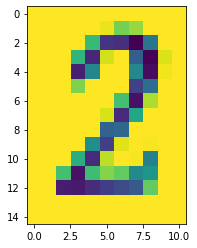

In [131]:
letter_image_file = 'extracted_letter_images/2/000001.png'

image = cv2.imread(letter_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape) 
(h, w) = image.shape[:2] # note that cv.imread gets an array of h x w, h goes first
# add [:2] so that even if color image will work, not needed here though

plt.imshow(image)
plt.show()

Since `h > w`, we make sure `h` fits in our desired height value, e.g., 20:

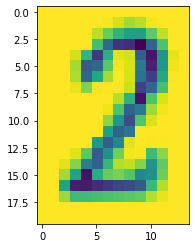

In [132]:
import imutils

image = imutils.resize(image, height=20)
# imutils.resize maintains the aspect ratio

plt.imshow(image)
plt.show()

Now we pad along width to make the image square, i.e., 20 x 20:

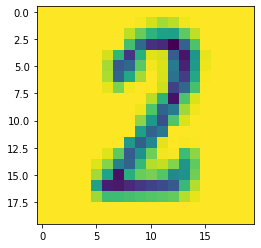

In [133]:
# determine the padding values for the width (= 20)
# to obtain the target dimensions
padW = int((20 - image.shape[1]) / 2.0) # may have rounding

# pad the image
image = cv2.copyMakeBorder(image, 0, 0, padW, padW,
        cv2.BORDER_REPLICATE)

# apply one more resizing to handle any rounding issues
image = cv2.resize(image, (20, 20))

plt.imshow(image)
plt.show()

Using what you learned, now write a function to resize images. Note that you also need to handle the possible case `h < w`:

In [134]:
def resize_to_fit(image, width, height):
    """
    A helper function to resize an image to fit within a given size
    - param image: image to resize
    - param width: desired width in pixels
    - param height: desired height in pixels
    - return: the resized image
    """

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
    (h, w) = image.shape[:2]

    if w > h:
        image = imutils.resize(image, width=width)

    else:
        image = imutils.resize(image, height=height)

    padW = int((width - image.shape[1]) / 2.0)
    padH = int((height - image.shape[0]) / 2.0)
    
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW,
        cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))    
    
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # return the pre-processed image
    return image

Prepare the training and validating datasets:

In [135]:
from imutils import paths

# initialize the data and labels
data_labels = []

progress_folder = ''

# loop over the input images
# imutils.paths.list_images will list all images in the 32 subfolders
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the letter so it fits in a 20x20 pixel box
    image = resize_to_fit(image, 20, 20)

    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)

    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]
    # extracted_letter_images/2/000001.png, after split
    # extracted_letter_images, 2, 000001.png
    # so 2 is the 2nd last, accessed using index -2
    
    if label != progress_folder:
        print('Processing Folder', label)
        progress_folder = label
    
    # Add the letter image and it's label to our training data
    data_labels.append((image,label))


Processing Folder 6
Processing Folder L
Processing Folder 5
Processing Folder X
Processing Folder M
Processing Folder N
Processing Folder J
Processing Folder 8
Processing Folder 3
Processing Folder T
Processing Folder S
Processing Folder P
Processing Folder E
Processing Folder K
Processing Folder F
Processing Folder R
Processing Folder 7
Processing Folder W
Processing Folder G
Processing Folder 9
Processing Folder 2
Processing Folder Q
Processing Folder B
Processing Folder A
Processing Folder D
Processing Folder U
Processing Folder C
Processing Folder V
Processing Folder 4
Processing Folder H
Processing Folder Z
Processing Folder Y


In [136]:
import random 
random.shuffle(data_labels)
data=[x[0] for x in data_labels]
labels=[x[1] for x in data_labels]

Convert lists into NumPy arrays as required by Keras for input + data normalization:

In [137]:
# scale the raw pixel intensities to the range [0, 1] (this is important!!!)
data = np.array(data, dtype="float") / 255.0

# you may also use std rather than 255, and center the data by mean as follows:
#data = (np.array(data, dtype="float") - data.mean()) / data.std()
# in this case you need to remember the mean and std for use during testing later

# scaling is not needed if you use BatchNormalization after Conv2D and before Activation

labels = np.array(labels)

Split into training and validation datasets:

In [138]:
from sklearn.preprocessing import LabelBinarizer

# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(labels)
print(lb.classes_)
labels = lb.transform(labels)
print()
print(labels)

['2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J' 'K'
 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [139]:
import pickle

MODEL_LABELS_FILENAME = "model_labels.dat"

# Save the mapping from labels to one-hot encodings.
# We'll need this later when we use the model to decode what it's predictions mean
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lb, f)

Now we are ready to train it using Keras. We’ll use a simple convolutional neural network architecture with two convolutional layers and two fully-connected layers:

In [140]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session() # free existing Keras models

# Build the neural network!
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 50)        9050      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               625500    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1

In [142]:
!pip install pydot==1.2.3

In [143]:
# Due to lack of dependencies below cell is prune to error.

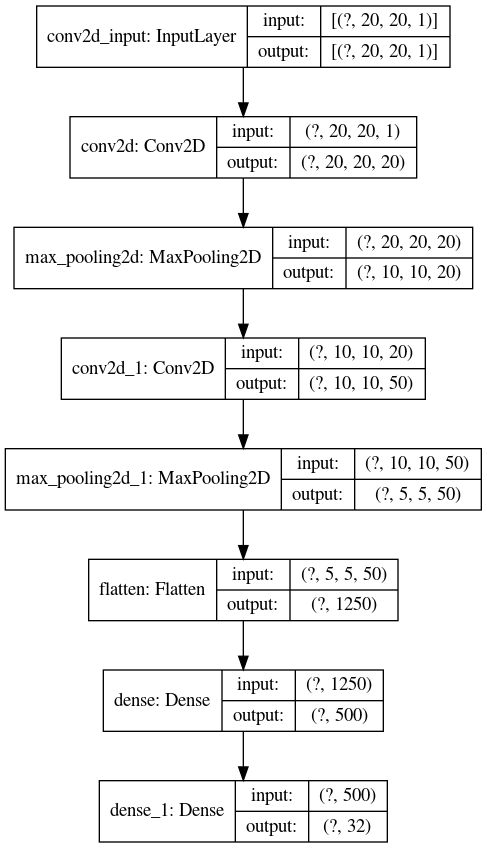

In [144]:
import tensorflow
from tensorflow.keras.utils import plot_model

MODEL_PLOT_FILE = 'model_plot.png'
plot_model(model, to_file=MODEL_PLOT_FILE, show_shapes=True, show_layer_names=True)
display(Image(filename=MODEL_PLOT_FILE))

In [145]:
!pip install pydot==1.2.3

Questions: (1) Why `conv2d_1` has 9050 parameters? (2) Why `dense` has 625500 parameters?

Hint: self-study http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
    
**The conv2d_1 has 9050 paramaters because it's a layer which encapsulates a set of “filters”. The filters takes a subset of the input data at a time, but are applied across the full input (by sweeping over the input). The operations performed by convolutional layer is linear/matrix multiplications, but they go through an activation function at the output, which is usually a non-linear operation. 
The dense has 625500 parameters for the reason as it's a linear operation in which every input is linked to every output by a weight (so there are n_inputs * n_outputs weights - which can be a lot). Generally followed by a non-linear activation function.:**


Now, let us do the actual training:

In [146]:
# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [147]:
# Train the neural network, 20% of the data is used for validation
model.fit(data, labels, validation_split=0.20, batch_size=32, epochs=10, verbose=1)

Train on 30995 samples, validate on 7749 samples
Epoch 1/10
30995/30995 [==============================] - 23s 745us/sample - loss: 0.2270 - acc: 0.9468 - val_loss: 0.0168 - val_acc: 0.9961
Epoch 2/10
30995/30995 [==============================] - 23s 729us/sample - loss: 0.0123 - acc: 0.9967 - val_loss: 0.0127 - val_acc: 0.9966
Epoch 3/10
30995/30995 [==============================] - 24s 765us/sample - loss: 0.0063 - acc: 0.9982 - val_loss: 0.0331 - val_acc: 0.9923
Epoch 4/10
30995/30995 [==============================] - 22s 721us/sample - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0098 - val_acc: 0.9973
Epoch 5/10
30995/30995 [==============================] - 23s 731us/sample - loss: 0.0035 - acc: 0.9990 - val_loss: 0.0060 - val_acc: 0.9985
Epoch 6/10
30995/30995 [==============================] - 22s 694us/sample - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0095 - val_acc: 0.9979
Epoch 7/10
30995/30995 [==============================] - 21s 692us/sample - loss: 0.0018 - acc: 0.9995 -

Save the model for later use:

In [148]:
MODEL_FILENAME = "captcha_model.hdf5"

# Save the trained model to disk
model.save(MODEL_FILENAME)

In [149]:
#See what will happen if you do not scale your data by 255.0?
#HINT: simply train again with data/255.0 instead of 255, and see how the loss and acc look like;
#      you need to recreate your model by running the cell containing clear_session() before

# 
data = np.array(data, dtype="float") / 255
labels = np.array(labels)

## Step 3: Use the model to solve CAPTCHAs!

The rest part can be run independently once models are saved.

Get an image from the online demo: https://contactform7.com/captcha/ and try our model on it:

In [150]:
# replace the url with the link of the image you see
# [Using the same image will cause points deducted !!!]
!wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/2511677462.png
# use the name of the file you downloaded
TEST_FILE_NAME = '2511677462.png'

# show the image
from IPython.display import Image

display(Image(filename=TEST_FILE_NAME))

--2020-02-17 18:25:20--  https://contactform7.com/wp-content/uploads/wpcf7_captcha/2511677462.png
Resolving contactform7.com (contactform7.com)... 104.31.88.199, 104.31.89.199, 2606:4700:3030::681f:59c7, ...
Connecting to contactform7.com (contactform7.com)|104.31.88.199|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-02-17 18:25:20 ERROR 404: Not Found.



Load saved model data:

In [151]:
from tensorflow.keras.models import load_model
import pickle

MODEL_FILENAME = "captcha_model.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

# Load up the model labels (so we can translate model predictions to actual letters)
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

# Load the trained neural network
model = load_model(MODEL_FILENAME)

Load packages and define functions for independent running of Part 3:

In [152]:
import numpy as np
import imutils
import cv2

# [!!! please also run the cell defining function "resize_to_fit" again, if you run Part 3 alone]

Get the letters from the downloaded images:

In [153]:
# Load the image and convert it to grayscale
# Load the image and convert it to grayscale
image = cv2.imread(TEST_FILE_NAME)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

# threshold the image (convert it to pure black and white)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# find the contours (continuous blobs of pixels) the image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

letter_image_regions = []

# Now we can loop through each of the four contours and extract the letter
# inside of each one
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image_regions.append((x, y, w, h))

# If we found more or less than 4 letters in the captcha, our letter extraction
# didn't work correcly. Skip the image instead of saving bad training data!
if len(letter_image_regions) != 4:
    print('[WARNING]', TEST_FILE_NAME, 'has', len(letter_image_regions), 'contours, unable to process')
else:
    print('[SUCCESS]')

[SUCCESS]


If you see a warning, use another image instead and repeat the previous steps.

Otherwise, continue to create an output image:

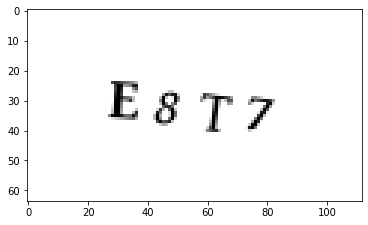

In [154]:
# Sort the detected letter images based on the x coordinate to make sure
# we are processing them from left-to-right so we match the right image
# with the right letter
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3) # 2D gray image -> 3D color image

# show the 3D image
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(output)
plt.show()

CAPTCHA text is: E8T7


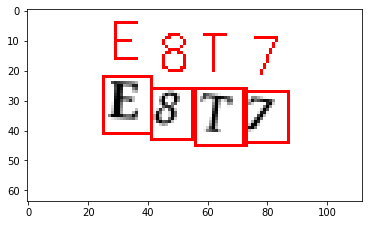

In [155]:
predictions = []

# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

    # Re-size the letter image to 20x20 pixels to match training data
    letter_image = resize_to_fit(letter_image, 20, 20)
    
    # Turn the single image into a 4D list of images to make Keras happy
    # 4D: image_number (=1) x height x width x channel (=1)
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)
    
    # Ask the neural network to make a prediction
    prediction = model.predict(letter_image) # output is one-hot encoded
        
    letter = lb.inverse_transform(prediction)[0]
    # use [0] since there is only one test data's label item in the list
    predictions.append(letter)
    
    # draw the prediction on the output image
    # (255, 0, 0) = red
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (255, 0, 0), 1)
    cv2.putText(output, letter, (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 0, 0), 1)

# see prediction result:

# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
plt.imshow(output)
plt.show()

Questions: Is the prediction correct? How many letters are correctly predicted?
    
**Yes, All four letters are predicted correctly:**
